In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
import math
from collections import Counter
from nltk.stem import SnowballStemmer
import numpy as np

In [2]:
df = pd.read_csv('res/bbc-text.csv')
category_num = df['category'].nunique()

In [3]:
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

In [4]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

In [5]:
df['cleaned_text'] = df['text'].apply(preprocess)

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

In [7]:
kmeans = KMeans(n_clusters=category_num, random_state=228)
kmeans.fit(X)
clusters = kmeans.predict(X)

In [8]:
ari = adjusted_rand_score(df['category'], clusters)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.5433743134421162


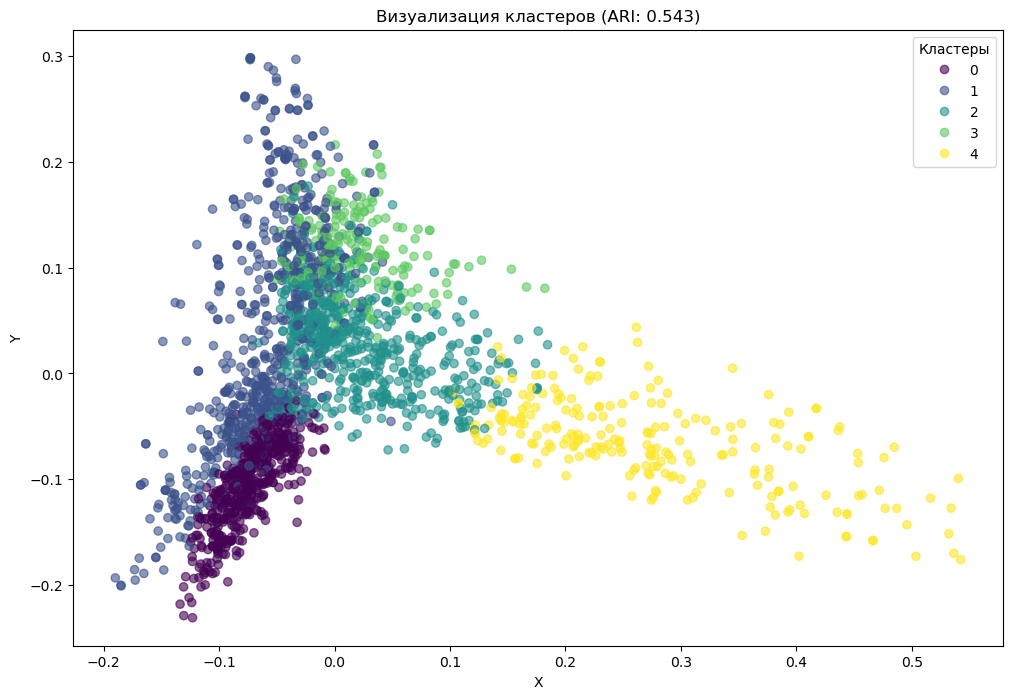

In [9]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=228)
X_reduced = pca.fit_transform(X.toarray())

plot_df = pd.DataFrame({
    'x': X_reduced[:, 0],
    'y': X_reduced[:, 1],
    'cluster': clusters,
    'category': df['category']
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(plot_df['x'], plot_df['y'],c=plot_df['cluster'], cmap='viridis',alpha=0.6)

plt.legend(*scatter.legend_elements(),
           title="Кластеры")
plt.title(f"Визуализация кластеров (ARI: {ari:.3f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(df['cleaned_text'], df['category'], test_size=0.3, random_state=228)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=228)

In [11]:
print(f"Всего данных: {len(df)}")
print(f"Тренировочные: {len(X_train)} ({len(X_train)/len(df):.0%})")
print(f"Валидационные: {len(X_val)} ({len(X_val)/len(df):.0%})")
print(f"Тестовые: {len(X_test)} ({len(X_test)/len(df):.0%})")
print("\nКоличество примеров по категориям в y_train:")
print(y_train.value_counts())

Всего данных: 2225
Тренировочные: 1557 (70%)
Валидационные: 334 (15%)
Тестовые: 334 (15%)

Количество примеров по категориям в y_train:
category
business         355
sport            350
politics         294
entertainment    286
tech             272
Name: count, dtype: int64
